In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Simulate clinical trial participant data
np.random.seed(42)
n = 1000
data = pd.DataFrame({
    'age': np.random.randint(18, 85, n),
    'bmi': np.random.normal(27, 5, n).round(1),
    'chronic_conditions': np.random.randint(0, 4, n),
    'prior_trials': np.random.randint(0, 2, n),
    'compliance_score': np.random.uniform(0, 1, n),
    'distance_to_site_km': np.random.normal(20, 10, n).round(1),
    'dropout': np.random.choice([0, 1], size=n, p=[0.8, 0.2])  # 0 = stayed, 1 = dropped out
})

In [8]:
# Prepare features and target
X = data.drop('dropout', axis=1)
y = data['dropout']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [10]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88       159
           1       0.50      0.05      0.09        41

    accuracy                           0.80       200
   macro avg       0.65      0.52      0.49       200
weighted avg       0.74      0.80      0.72       200



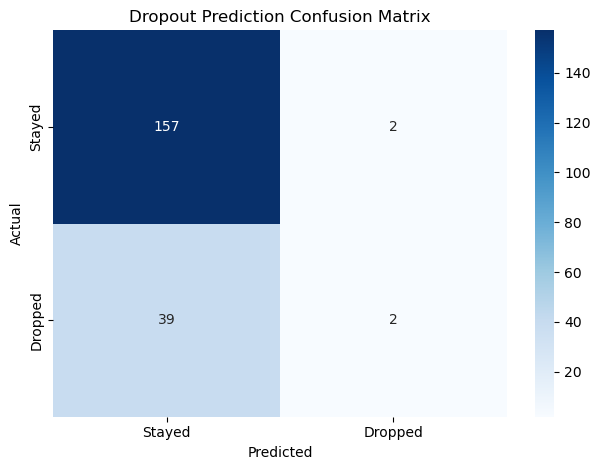

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Dropped"], yticklabels=["Stayed", "Dropped"])
plt.title("Dropout Prediction Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

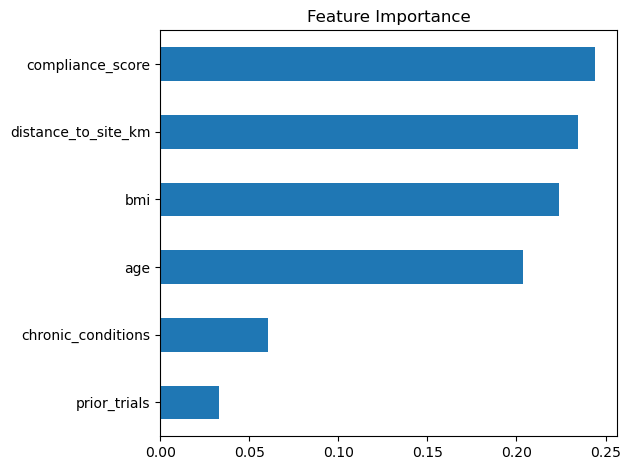

In [16]:
# Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importance')
plt.tight_layout()
plt.show()